# Credit Card Customer Segmentation using k-means clustering

Not all customers are alike. Consumers usually show a wide variety of behaviors. A lot of times, Segments that are used in businesses are threshold based.
With growing number of features and a general theme of personlized products, there is a need for a scietific based methodology to group customers together.
Clustering based on the behavioral data comes to the rescue.
The aim of this analysis is to group credit card holders in appropriate groups to better understand their needs and behaviors and to serve them better with appropriate marketing offers.

We will use k-means algorithm to create the appropriate segmentation strategy.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df_original = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv', index_col='CUST_ID')
df = df_original.copy()

In [3]:
df.shape

(8950, 17)

In [4]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

It's worth understanding what do these features correspond to:

* **BALANCE** : Balance amount left in customers account to make purchases
* **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 
* **PURCHASES** : Amount of purchases made from account
* **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
* **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
* **CASH_ADVANCE** : Cash in advance given by the user
* **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 
* **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go
* **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done
* **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
* **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
* **PURCHASES_TRX** : Numbe of purchase transactions made
* **CREDIT_LIMIT** : Limit of Credit Card for user
* **PAYMENTS** : Amount of Payment done by user
* **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
* **PRCFULLPAYMENT** : Percent of full payment paid by user
* **TENURE** : Tenure of credit card service for user

(1=frequent, 0=not frequent)

In [5]:
df.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C15955,434.729411,0.545455,1486.50,594.60,891.90,392.060381,0.333333,0.083333,0.250000,0.083333,3,4,3700.0,7228.692050,324.522761,0.000000,12
C17504,1569.712031,1.000000,375.92,375.92,0.00,38.237206,0.333333,0.333333,0.000000,0.083333,2,6,1700.0,530.069186,1003.039654,0.000000,12
C17572,20.920544,0.727273,392.96,0.00,392.96,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,4000.0,324.004832,108.557891,0.500000,12
C14822,1241.025652,1.000000,0.00,0.00,0.00,180.783929,0.000000,0.000000,0.000000,0.083333,1,0,1800.0,842.814061,405.720850,0.000000,12
C18289,97.299991,1.000000,427.67,0.00,427.67,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2500.0,557.777752,173.099027,0.000000,12
C15673,10.035492,1.000000,0.00,0.00,0.00,139.113927,0.000000,0.000000,0.000000,0.083333,2,0,1000.0,154.970698,77.402578,0.000000,12
C12584,147.418569,0.181818,1074.00,1074.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,5500.0,0.000000,NaN,0.000000,12
C12588,366.441008,0.636364,0.00,0.00,0.00,2838.753109,0.000000,0.000000,0.000000,0.083333,3,0,3000.0,4634.133777,476.217118,0.250000,12
C12936,4028.756012,1.000000,361.07,104.38,256.69,0.000000,1.000000,0.166667,1.000000,0.000000,0,18,4300.0,1279.931508,1537.985000,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [7]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Filling out all the null values using median 
# More appropriate strategies might be required depending on the context
df.fillna(df.median(), inplace=True)

In [9]:
for col in df.columns:
    print('{:33} : {:6} : {:}'.format(col, df[col].nunique(), df[col].dtype))

BALANCE                           :   8871 : float64
BALANCE_FREQUENCY                 :     43 : float64
PURCHASES                         :   6203 : float64
ONEOFF_PURCHASES                  :   4014 : float64
INSTALLMENTS_PURCHASES            :   4452 : float64
CASH_ADVANCE                      :   4323 : float64
PURCHASES_FREQUENCY               :     47 : float64
ONEOFF_PURCHASES_FREQUENCY        :     47 : float64
PURCHASES_INSTALLMENTS_FREQUENCY  :     47 : float64
CASH_ADVANCE_FREQUENCY            :     54 : float64
CASH_ADVANCE_TRX                  :     65 : int64
PURCHASES_TRX                     :    173 : int64
CREDIT_LIMIT                      :    205 : float64
PAYMENTS                          :   8711 : float64
MINIMUM_PAYMENTS                  :   8636 : float64
PRC_FULL_PAYMENT                  :     47 : float64
TENURE                            :      7 : int64


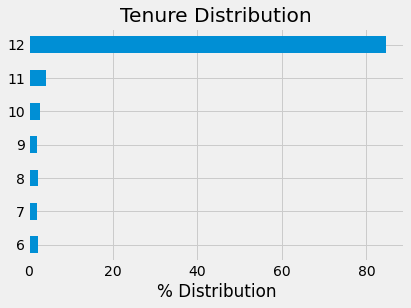

In [10]:
(1e2*df['TENURE'].value_counts().sort_index()/len(df)).plot(kind='barh')
plt.title('Tenure Distribution')
plt.xlabel('% Distribution');

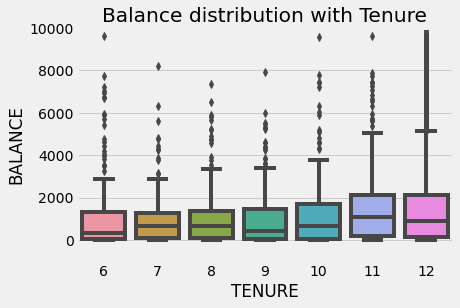

In [11]:
sns.boxplot(x="TENURE", y="BALANCE", data=df)
plt.ylim(-10**3, 10**4)
plt.title('Balance distribution with Tenure');

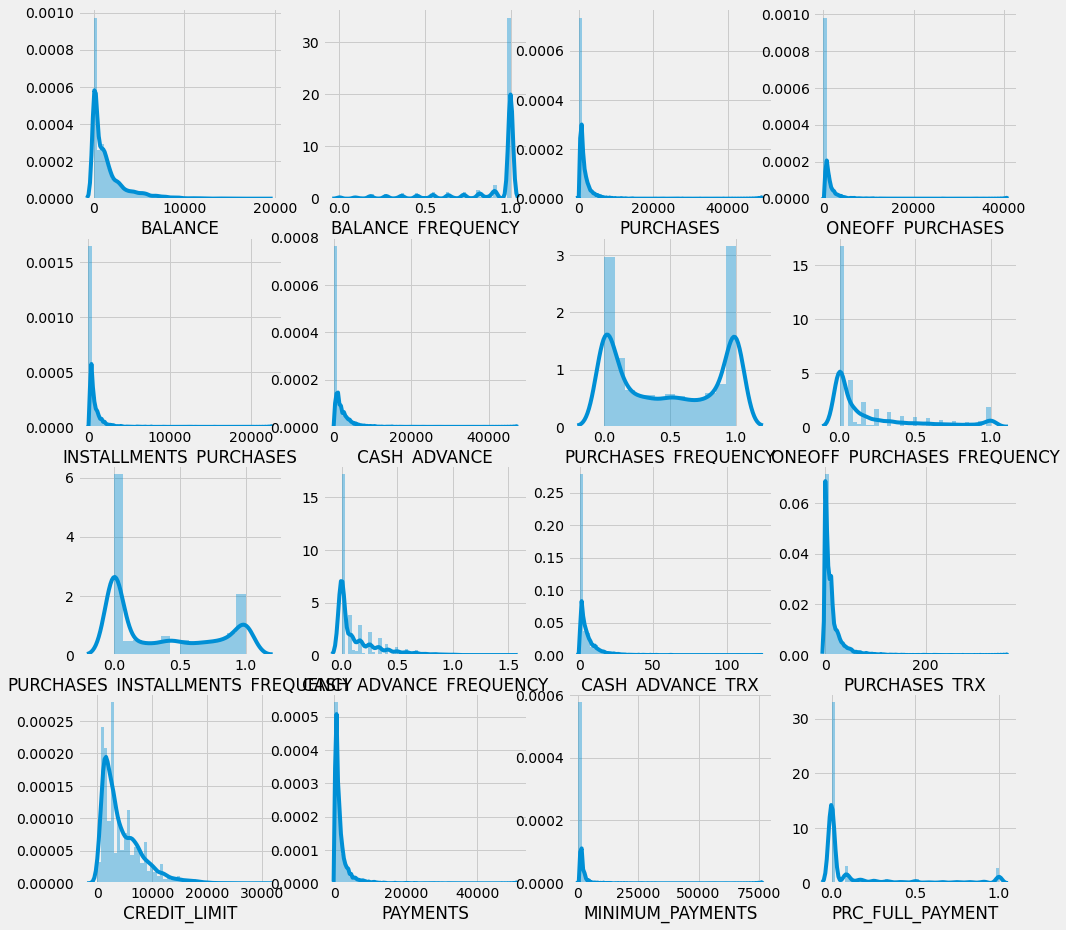

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i in range(4):
    for j in range(4):
        sns.distplot(df[df.columns[4 * i + j]], ax=axs[i,j])
plt.show()

In [13]:
df.shape

(8950, 17)

In [14]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=1)
df['k_5_label'] = kmeans.fit_predict(df)

The intertia is one measure of understanding the behaviors of clusters.

In [15]:
kmeans.inertia_

182339068022.99228

In [16]:
profile = df.groupby('k_5_label').mean().T

In [17]:
round(profile)

k_5_label,0,1,2,3,4
BALANCE,798.0,5519.0,4776.0,1644.0,4451.0
BALANCE_FREQUENCY,1.0,1.0,1.0,1.0,1.0
PURCHASES,488.0,1532.0,11730.0,1458.0,1163.0
ONEOFF_PURCHASES,235.0,931.0,8394.0,910.0,168.0
INSTALLMENTS_PURCHASES,254.0,601.0,3336.0,548.0,995.0
CASH_ADVANCE,492.0,3864.0,5156.0,828.0,1004.0
PURCHASES_FREQUENCY,0.0,0.0,1.0,1.0,0.0
ONEOFF_PURCHASES_FREQUENCY,0.0,0.0,1.0,0.0,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0,0.0,1.0,0.0,0.0
CASH_ADVANCE_FREQUENCY,0.0,0.0,0.0,0.0,0.0


In [18]:
# round(profile.apply(lambda x: (max(x) - min(x))/x.median(), axis=1))

In [19]:
round(pd.DataFrame(kmeans.cluster_centers_.T))

,0,1,2,3,4
0,798.0,5519.0,4776.0,1644.0,4451.0
1,1.0,1.0,1.0,1.0,1.0
2,488.0,1532.0,11730.0,1458.0,1163.0
3,235.0,931.0,8394.0,910.0,168.0
4,254.0,601.0,3336.0,548.0,995.0
5,492.0,3864.0,5156.0,828.0,1004.0
6,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0


## Minibatch Clustering

In [20]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=1)
df['k_5_batch'] = minibatch_kmeans.fit_predict(df)

In [21]:
pd.crosstab(df['k_5_label'], df['k_5_batch'])

k_5_batch,0,1,2,3,4
k_5_label,,,,,
0,5052,0,19,369,0
1,0,616,210,25,35
2,0,18,0,2,92
3,17,3,1807,614,33
4,11,26,0,1,0


In [22]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluations of clustering metrics

To figure out the number of clusters that can be found out in our datasets, we can evaluate a set of indices or scores.

1. Silhoutte score
2. Calinski Harabasz score
3. Davies Bouldin score


In [23]:
def evaluate_metrics(df, min_clust=2, max_clust=10, rand_state=1):
    inertias = []
    silhouette = []
    ch_score = []
    db_score = []
    for n_clust in range(min_clust, max_clust):
        kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
        y_label = kmeans.fit_predict(df)
        inertias.append(kmeans.inertia_)
        silhouette.append(silhouette_score(df, y_label))
        ch_score.append(calinski_harabasz_score(df, y_label))
        db_score.append(davies_bouldin_score(df, y_label))        

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0][0].plot(range(min_clust, max_clust), inertias, '-x', linewidth=2)
    ax[0][0].set_xlabel('No. of clusters')
    ax[0][0].set_ylabel('Inertia')
    
    ax[0][1].plot(range(min_clust, max_clust), silhouette, '-x', linewidth=2)
    ax[0][1].set_xlabel('No. of clusters')
    ax[0][1].set_ylabel('Silhouette Score')
    
    ax[1][0].plot(range(min_clust, max_clust), ch_score, '-x', linewidth=2)
    ax[1][0].set_xlabel('No. of clusters')
    ax[1][0].set_ylabel('Calinski Harabasz Score')
    
    ax[1][1].plot(range(min_clust, max_clust), db_score, '-x', linewidth=2)
    ax[1][1].set_xlabel('No. of clusters')
    ax[1][1].set_ylabel('Davies Bouldin Score')
    fig.suptitle('Metrics to evaluate the number of clusters')
    plt.show()

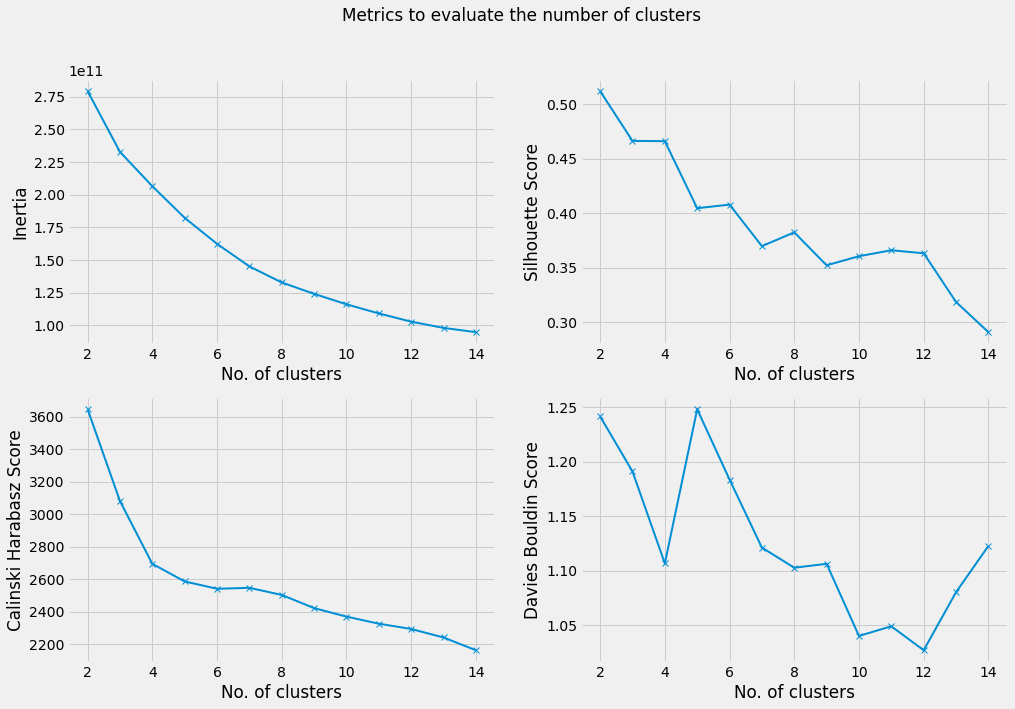

In [24]:
evaluate_metrics(df.iloc[:, :-2], min_clust=2, max_clust=15, rand_state=0)

# Scaling of features

In [25]:
df = df_original.copy()
df.fillna(df.median(), inplace=True)

In [26]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df)

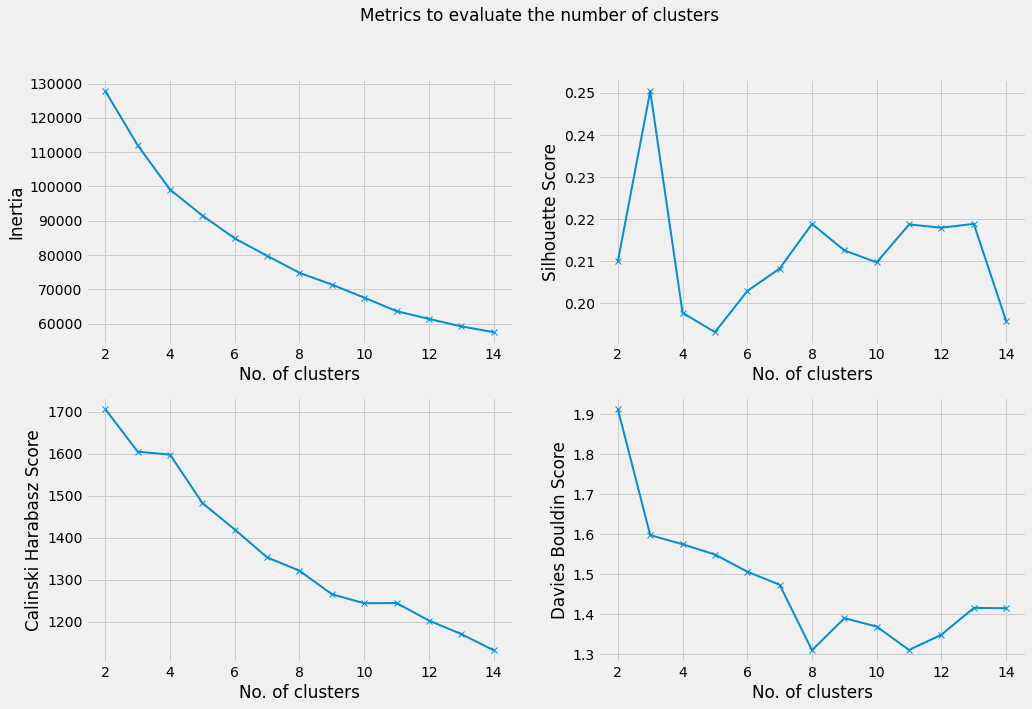

In [27]:
evaluate_metrics(df_scaled, min_clust=2, max_clust=15, rand_state=0)

In [28]:
from yellowbrick.cluster.silhouette import SilhouetteVisualizer

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


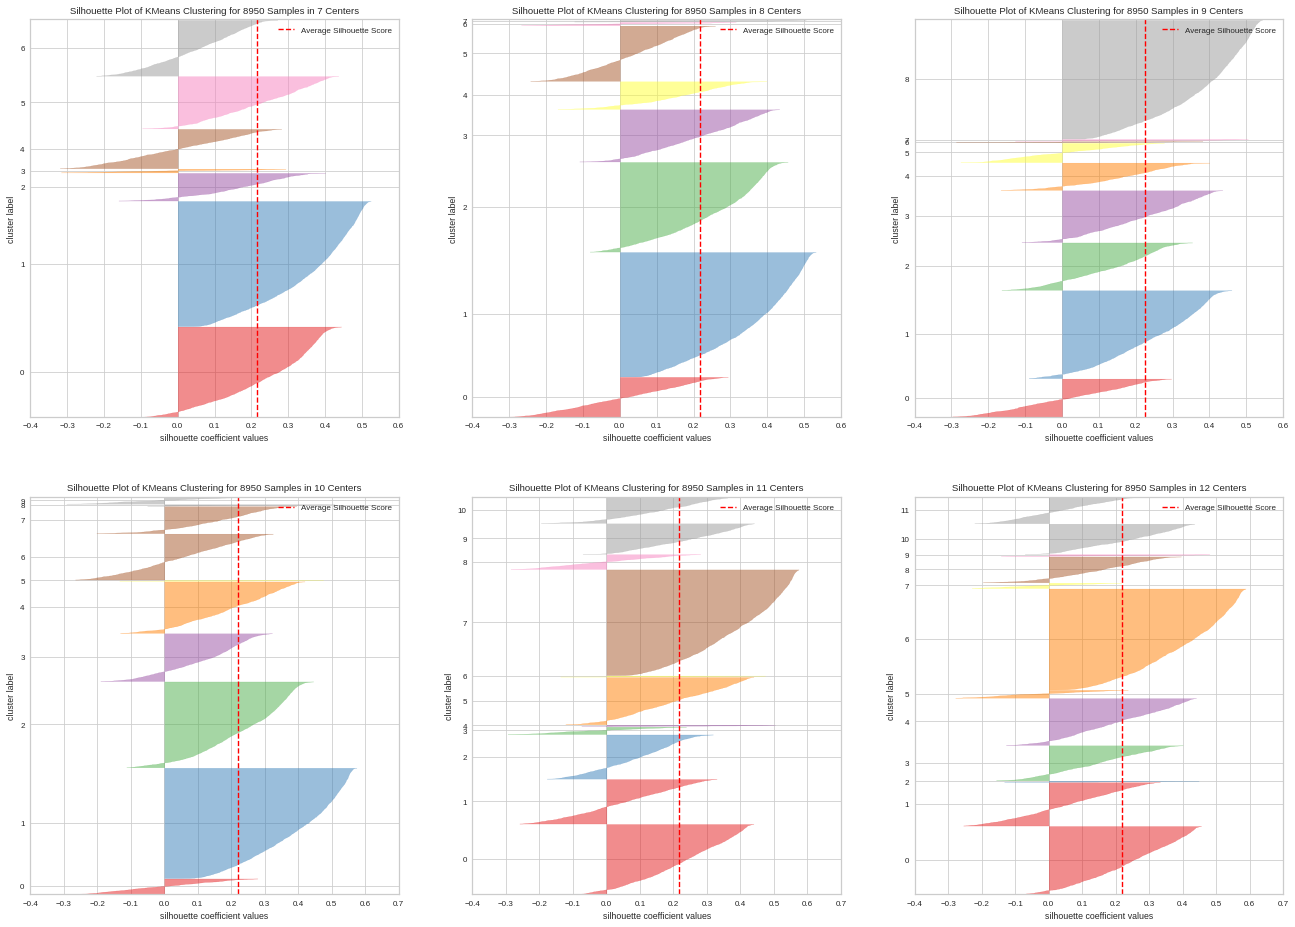

In [29]:
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs = axs.reshape(6)
for i, k in enumerate(range(7, 13)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=1), ax=ax)
    sil.fit(df_scaled)
    sil.finalize()

In [30]:
plt.style.use('fivethirtyeight')

With the general intuition obtained from various methods above, we conclude that 8 seems to be an appropriate number for clustering.

In [31]:
df.T

CUST_ID,C10001,C10002,C10003,C10004,C10005,C10006,C10007,C10008,C10009,C10010,...,C19181,C19182,C19183,C19184,C19185,C19186,C19187,C19188,C19189,C19190
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335,1809.828751,627.260806,1823.652743,1014.926473,152.225975,...,130.838554,5967.475270,40.829749,5.871712,193.571722,28.493517,19.183215,23.398673,13.457564,372.708075
BALANCE_FREQUENCY,0.818182,0.909091,1.000000,0.636364,1.000000,1.000000,1.000000,1.000000,1.000000,0.545455,...,1.000000,0.833333,1.000000,0.500000,0.833333,1.000000,1.000000,0.833333,0.833333,0.666667
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000,1333.280000,7091.010000,436.200000,861.490000,1281.600000,...,591.240000,214.550000,113.280000,20.900000,1012.730000,291.120000,300.000000,144.400000,0.000000,1093.250000
ONEOFF_PURCHASES,0.000000,0.000000,773.170000,1499.000000,16.000000,0.000000,6402.630000,0.000000,661.490000,1281.600000,...,0.000000,0.000000,0.000000,20.900000,1012.730000,0.000000,0.000000,0.000000,0.000000,1093.250000
INSTALLMENTS_PURCHASES,95.400000,0.000000,0.000000,0.000000,0.000000,1333.280000,688.380000,436.200000,200.000000,0.000000,...,591.240000,214.550000,113.280000,0.000000,0.000000,291.120000,300.000000,144.400000,0.000000,0.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8555.409326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.558778,127.040008
PURCHASES_FREQUENCY,0.166667,0.000000,1.000000,0.083333,0.083333,0.666667,1.000000,1.000000,0.333333,0.166667,...,1.000000,0.833333,1.000000,0.166667,0.333333,1.000000,1.000000,0.833333,0.000000,0.666667
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.000000,1.000000,0.083333,0.083333,0.000000,1.000000,0.000000,0.083333,0.166667,...,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.666667
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.000000,0.000000,0.000000,0.000000,0.583333,1.000000,1.000000,0.250000,0.000000,...,0.833333,0.666667,0.833333,0.000000,0.000000,0.833333,0.833333,0.666667,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,0.000000,0.250000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.333333


In [32]:
kmeans = MiniBatchKMeans(n_clusters=8, random_state=1)
df['k_8_label'] = kmeans.fit_predict(df)

Let's look at the distribution of the population within the cluster.

In [33]:
round(1e2 * df['k_8_label'].value_counts().sort_index()/len(df), 2)

0    23.34
1     8.07
2     2.13
3     3.70
4    15.42
5     2.54
6    43.90
7     0.91
Name: k_8_label, dtype: float64

This uneven distribution in the clusters is a desirable or undesirable thing, depending on the business context.
If there is a need for equal number of clustes in the datasets, then some of the clusters can be combined into other clusters.
If however, the business ask is to create a anomaly/fraud detection strategy (for example, identification of gamers), then having a small number of customers in a particular segment is not an issue.

Let us see the profiles of the customers in different groups.

In [34]:
round(df.groupby('k_8_label').mean().T, 2)

k_8_label,0,1,2,3,4,5,6,7
BALANCE,1563.49,5547.47,3323.73,3987.81,917.39,4254.12,575.65,3486.97
BALANCE_FREQUENCY,0.92,0.98,0.97,0.91,0.88,0.90,0.83,0.99
PURCHASES,1004.55,677.56,10861.13,2175.66,1324.10,904.90,378.56,942.39
ONEOFF_PURCHASES,573.97,411.32,7800.81,1373.28,788.00,512.78,164.70,134.21
INSTALLMENTS_PURCHASES,430.89,266.33,3060.32,802.38,536.78,392.22,214.12,808.18
CASH_ADVANCE,1078.10,3601.84,741.68,920.66,261.43,8545.89,277.49,875.06
PURCHASES_FREQUENCY,0.48,0.34,0.91,0.68,0.63,0.34,0.45,0.48
ONEOFF_PURCHASES_FREQUENCY,0.23,0.17,0.75,0.43,0.35,0.17,0.10,0.04
PURCHASES_INSTALLMENTS_FREQUENCY,0.35,0.24,0.68,0.49,0.43,0.25,0.35,0.45
CASH_ADVANCE_FREQUENCY,0.17,0.38,0.07,0.11,0.05,0.47,0.09,0.10


In [35]:
#fig, ax = plt.subplots(figsize=(6, 4))
df.mean()

BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.282473
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     844.906767
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
k_8_label                              3.675196
dtype: float64

Let us look at some of the main features of the clusters. **Balances, Purchases, Cash advances, Credit Limit, Payments** are some of the most important features at play for credit card products. It is really important however to be aware and keep in the mind the percentage distribution of the clusters.

In [36]:
round(1e2 * df['k_8_label'].value_counts().sort_index()/len(df))

0    23.0
1     8.0
2     2.0
3     4.0
4    15.0
5     3.0
6    44.0
7     1.0
Name: k_8_label, dtype: float64

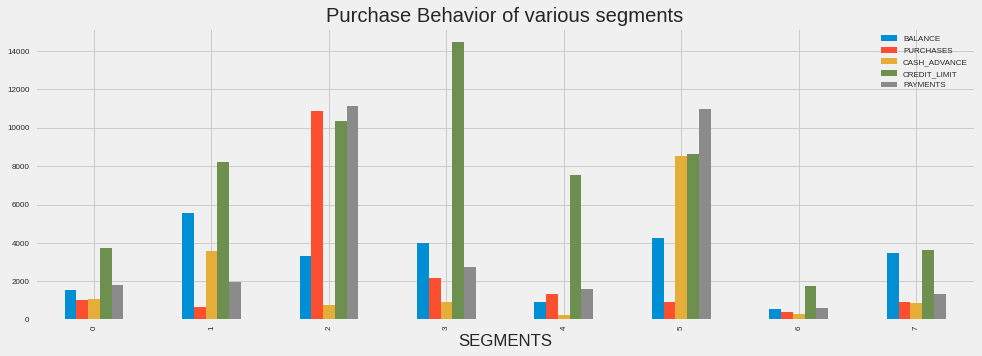

In [37]:
(df[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'k_8_label']]
 .groupby('k_8_label').mean().plot.bar(figsize=(15, 5)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS');

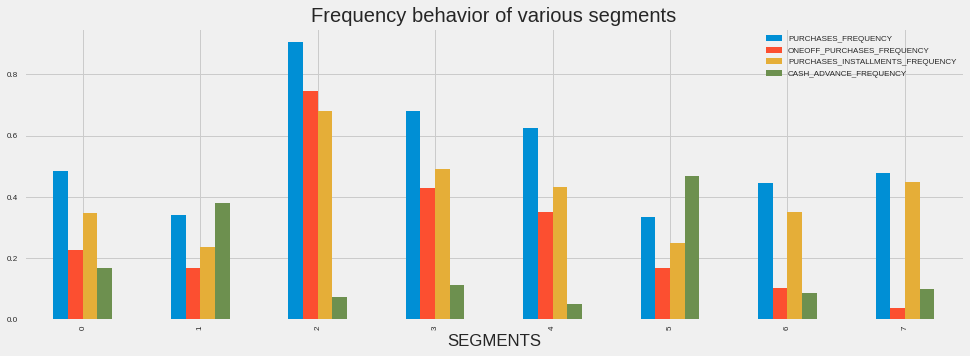

In [38]:
(df[['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'k_8_label']]
 .groupby('k_8_label').mean().plot.bar(figsize=(15, 5)))
plt.title('Frequency behavior of various segments')
plt.xlabel('SEGMENTS');

# Observations: 

## Large segments:
* **Cluster 6**: This cluster shows low balances but average activity. This cluster will be an approprite cluster for spend campaign targetting.
* **Cluster 0**: This cluster shows slightly higher balances and purchase activities, but higher one-off purchase behavior. 
* **Cluster 4**: This cluster has the highest activity, balances, and purchases. This group of customers interestingly also have a higher set of credit lines, indicating that an increasing credit limit increases leads to an increase in the purchase activitis. (A rigourous testing of this hypothesis should be carries out.)

## Small segments:
* **Cluster 2**: This group of customers is in a dire need of a credit limit increase. They also have the highest activities among all the clusters.
* **Cluster 3**: This group of customers on the other hand are not completely utilizing the credit line assigned to them. Additional investigations are needed to understand why this particular set of consumers are not utilizing their lines or if their credit lines could in the future be assigned to a different set of consumers.